# AIR QUALITY PREDICTION USING RIDGE AND LASSO REGRESSION

- https://en.tutiempo.net/climate  Using this website builded the Webscrapping with the library of beautyfulsoup


In this Project Scrapping the data from the website and after taken data we calcluated the daily hours Air Qulaity data into daily average data of 2013 to 2017  for target value  PM2.5 after We Predicting the Air Quality using Decision Tree Regression and also comparison between previous model Linear Regression and lasso and ridge regression and get which is the best for this usecase

Columns
- T	Average annual temperature
- TM	Annual average maximum temperature
- Tm	Average annual minimum temperature
- PP	Rain or snow precipitation total annual
- V	Annual average wind speed
- RA	Number of days with rain
- SN	Number of days with snow
- TS	Number of days with storm
- FG	Number of foggy days
- TN	Number of days with tornado
- GR	Number of days with hail

Lets import required libraries to the project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Lets extract the data from the file

In [2]:
df = pd.read_csv('Data/Real-Data/Real_Combine.csv')

In [3]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,239.695455
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,264.064286
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


Lets Check the dataset have null values or not uisng heatmap

In [4]:
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM2.5    22
dtype: int64

As we seen here PM 2.5 has one null values lets drop the one column beacause one values of drop will not effect to the model...

In [5]:
df = df.dropna()

In [6]:
X = df.iloc[:,:-1]  ##Independent Features, 
#In this we just drop the last feature and consider reamaining features as 
#independent features

Y = df.iloc[:,-1] ##Dependent Features,
##In this we just drop all the feature instaead last features
#for dependent features

### Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [7]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [8]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


Lets Check the which features have more values using ensemble techniques of Feature selection

In [9]:
print(model.feature_importances_)

[0.14479847 0.09698329 0.19081728 0.13635791 0.0765898  0.26010127
 0.0535246  0.04082737]


Lets visualize the data with top 5 features and top 5 features will aply to the model

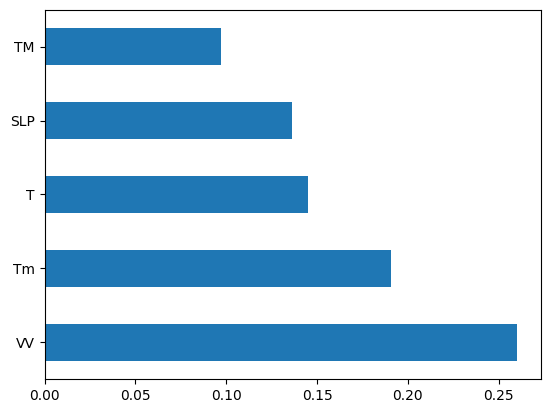

In [10]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In first we apply the machine learning lets just see for the referebce comparison

<Axes: xlabel='PM2.5', ylabel='Count'>

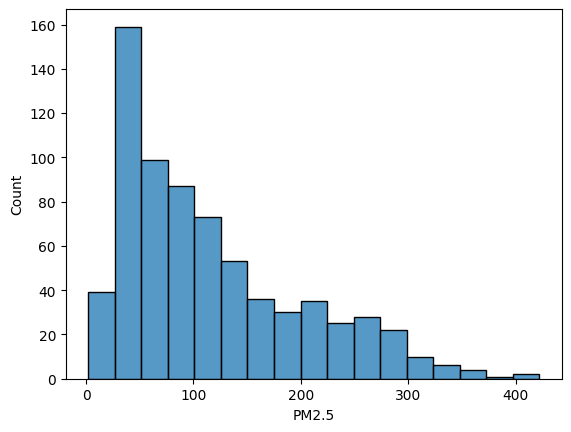

In [11]:
sns.histplot(Y)

## Train Test Split

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

## Decision Tree Regressor

In [13]:
from sklearn.tree import DecisionTreeRegressor

In [58]:
dtree=DecisionTreeRegressor(criterion='squared_error',max_depth=5, random_state=42)

In [59]:
dtree.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [60]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, Y_train)))

Coefficient of determination R^2 <-- on train set: 0.7811108638670629


In [61]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(X_test, Y_test)))

Coefficient of determination R^2 <-- on test set: 0.5416398097274713


It looks like Overfitting because for training data it showing low bias result but for test data it showing high variances

Lets check cross validation score

In [62]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtree,X,Y,cv=5)

In [63]:
score.mean()

np.float64(0.45166172019790973)

## Model Evaluation

In [64]:
prediction = dtree.predict(X_test)

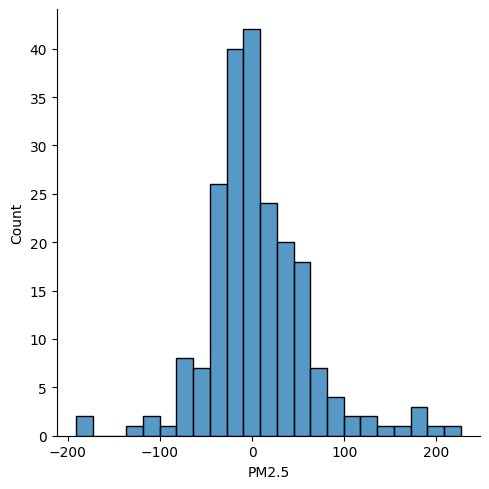

In [65]:
sns.displot(Y_test - prediction)

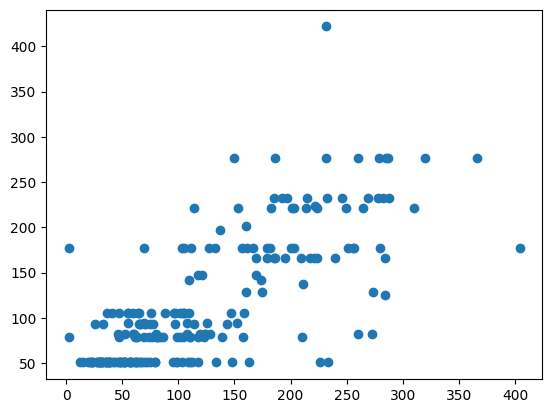

In [66]:
plt.scatter(Y_test,prediction)

## Hyperparameter Tuning Decision Tree Regressor

In [67]:
DecisionTreeRegressor()

DecisionTreeRegressor()

In [ ]:

# ## Hyper Parameter Optimization

# params={
#  "splitter"    : ["best","random"] ,
#  "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
#  "min_samples_leaf" : [ 1,2,3,4,5 ],
# "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
#  "max_features" : ["auto","log2","sqrt",None ],
#     "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
# }

In [68]:
params = {
    "splitter": ["best"],  # Removed "random"
    "max_depth": [3, 5, 7, 9, 11],  # Reduced deep trees
    "min_samples_leaf": [2, 5, 10, 15],  # Prevents overfitting
    "min_weight_fraction_leaf": [0.01, 0.05, 0.1],  # Smaller fractions
    "max_features": ["sqrt", "log2", None],  # Removed "auto"
    "max_leaf_nodes": [None, 10, 20, 30, 40, 50]  # Slightly reduced range
}


In [69]:
## Hyperparameter optimization using GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [70]:

# random_search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

random_search = RandomizedSearchCV(DecisionTreeRegressor(), param_distributions=params,
                                   scoring='neg_mean_squared_error', n_jobs=-1,
                                   cv=10, verbose=3, n_iter=20, random_state=42)

In [71]:
from datetime import datetime
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [72]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,Y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 20 candidates, totalling 200 fits

 Time taken: 0 hours 0 minutes and 4.97 seconds.


Finding which parameter is best

In [73]:
random_search.best_params_

{'splitter': 'best',
 'min_weight_fraction_leaf': 0.05,
 'min_samples_leaf': 5,
 'max_leaf_nodes': 30,
 'max_features': None,
 'max_depth': 7}

In [74]:
random_search.best_score_

np.float64(-3418.9334735986026)

In [75]:
predictions=random_search.predict(X_test)

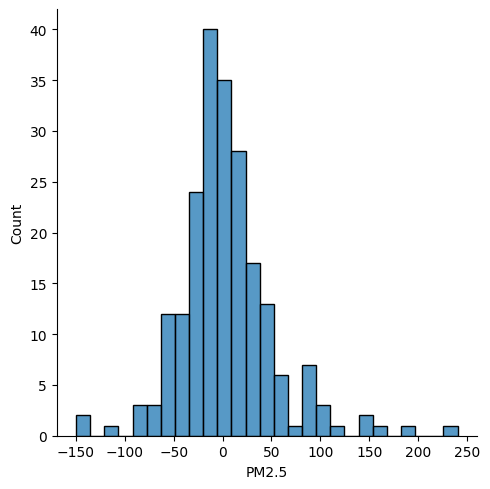

In [76]:
sns.displot(Y_test-predictions)

In [77]:
dtree_best = DecisionTreeRegressor(
    splitter="best",
    min_weight_fraction_leaf=0.05,
    min_samples_leaf=5,
    max_leaf_nodes=30,
    max_features=None,
    max_depth=7,
    random_state=42
)

dtree_best.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=7, max_leaf_nodes=30, min_samples_leaf=5,
                      min_weight_fraction_leaf=0.05, random_state=42)

In [78]:
print("Train R² Score:", dtree_best.score(X_train, Y_train))
print("Test R² Score:", dtree_best.score(X_test, Y_test))

Train R² Score: 0.6760281277505128
Test R² Score: 0.5573661782333539


In [79]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 33.56605111619662
MSE: 2377.7048195344846
RMSE: 48.76171469026171


Ops The decision tree bad than Lasso and Ridge 